<a href="https://colab.research.google.com/github/biasoviero/Analise_ENEM/blob/main/enem_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos dados do ENEM 2020



O Exame Nacional do Ensino Médio (ENEM) é realizado anualmente em todo o território brasileiro. O Exame é uma porta de entrada para as universidades públicas e avalia cinco áreas do conhecimento que, teoricamente, são aprendidas durante o ensino médio: 
* Ciências Humanas e Suas Tecnologias, que aborda filosofia, sociologia, geografia e história;
* Ciências da Natureza e Suas Tecnologias, que engloba física, química e biologia; 
* Linguagens, Códigos e suas Tecnologias, que avalia a Língua Portuguesa, língua estrangeira (o estudante escolhe entre inglês e espanhol), literatura, educação física e artes;
* Matemática e suas Tecnologias, que é a prova destinada inteiramente à Matemática e lógica;
* Redação, cujo tema é um problema enfrentado no país e, ao discorrer sobre, o estudante  deve apresentar uma proposta de intervenção.

A prova é dividida em dois domingos: o primeiro dia contém Ciências Humanas, Linguagens e Redação enquanto o segundo dia é destinado às provas de Matemática e Ciências da Natureza.

Os dados foram retirados do site do Governo Brasileiro:

INSTITUTO NACIONAL DE ESTUDOS E PESQUISAS EDUCACIONAIS ANÍSIO TEIXEIRA.
Microdados do Enem 2020. Brasília: Inep, 2020. Disponível em: < https://www.gov.br/inep/ptbr/acesso-a-informacao/dados-abertos/microdados/enem>. Acesso em: 14 março. 2022.

É válido adicionar que serão avaliados os dados da edição de 2020, que sofreram alterações na sua divulgação em relação aos anos anteriores com o fim de se adequar à Lei Geral de Proteção de Dados (LGPD). Dessa forma, algumas informações não foram reveladas, como a idade exata de alguns participantes e o município de residência.

Esse projeto foi realizado por [Beatriz Soviero](https://www.linkedin.com/in/beatriz-forneck-soviero-570b5322b/) como uma prática para os estudos de Análise de Dados com Python. Sinta-se à vontade para fazer alguma sugestão ou dúvida nos comentários! 😀

## Leitura dos dados

Primeiramente é preciso ler os dados, para isso, a biblioteca Pandas deve ser importada. O mesmo deve ser feito às demais bibliotecas que serão utilizadas posteriormente.

### Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install matplotlib --upgrade
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 
# comando utilizado para permitir o uso do Google Drive, já que utilizei o Google Colab para montar esse projeto e armazenei os dados no Drive.

Mounted at /content/drive


In [ ]:
enem = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/enem/MICRODADOS_ENEM_2020.csv', sep=';', encoding='ISO-8859-1')

### Visão geral dos dados


Antes de fazer qualquer tipo de análise, visualizaremos as primeiras cinco linhas dos dados para verificar como eles se apresentam.

In [ ]:
enem.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200006271946,2020,11,F,1,2,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200001195856,2020,11,M,2,3,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200001943954,2020,4,F,2,3,2,2,0,2,...,B,A,A,B,A,A,A,A,A,A
3,200001908998,2020,2,M,1,3,1,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200001634757,2020,4,F,1,3,2,1,1,1,...,A,A,A,B,A,B,B,A,A,B


Podemos perceber a coluna "NU_ANO", que informa o ano em que o estudante realizou o ENEM. Já que essa base de dados corresponde apenas à edição de 2020, todos possuem o mesmo valor. Desse modo, podemos excluí-la.

In [ ]:
enem = enem.drop(columns=['NU_ANO'])

Por fim, verificaremos a quantidade de linhas e colunas.

In [ ]:
enem.shape

(5783109, 75)

Com cada linha representando um candidato, há mais de cinco milhões! Com essa quantidade de informações, haverá maior lentidão ao executar o código. Para agilizar, filtraremos apenas as colunas necessárias para responder às perguntas.

## Análise Exploratória

A análise exploratória buscará responder a questões referentes aos participantes, à realização e ao resultado das provas, bem como a relação entre questões socioeonômicas dos candidatos e o seu desempenho. 

### Informações sobre os participantes

Para analisar os participantes, as colunas utilizadas serão: o número de inscrição, a faixa etária, o sexo, a cor/raça, a escola e se o candidato é treineiro ou não.

In [ ]:
enem_participante = enem.filter(items = ['NU_INSCRICAO','TP_FAIXA_ETARIA', 'TP_SEXO',\
                                         'TP_COR_RACA', 'TP_ESCOLA', 'IN_TREINEIRO'])

#### Distribuição da Faixa Etária

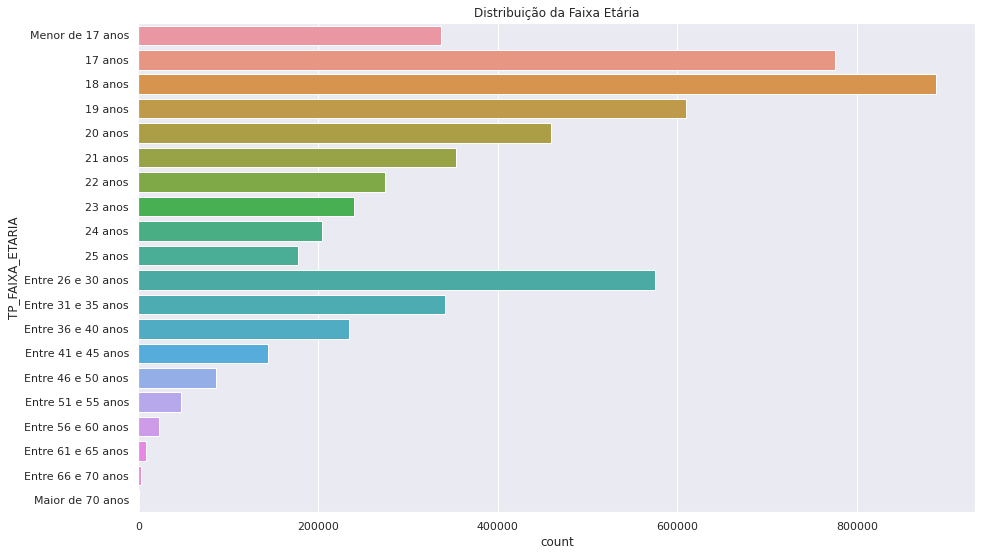

In [ ]:
plt.figure(figsize=(15,9))
y = np.array([x for x in range (0, 20)]) # os códigos para cada faixa etária serão substituídos pelos seus respectivos significados
textos_y = ['Menor de 17 anos', '17 anos', '18 anos','19 anos', '20 anos', '21 anos', '22 anos', '23 anos', '24 anos', '25 anos',\
            'Entre 26 e 30 anos', 'Entre 31 e 35 anos', 'Entre 36 e 40 anos', 'Entre 41 e 45 anos',\
            'Entre 46 e 50 anos', 'Entre 51 e 55 anos','Entre 56 e 60 anos', 'Entre 61 e 65 anos',\
            'Entre 66 e 70 anos', 'Maior de 70 anos']

sns.set_theme()
sns.countplot(data=enem_participante, y='TP_FAIXA_ETARIA', orient='h')
plt.yticks(y, textos_y)
plt.title('Distribuição da Faixa Etária')
plt.savefig('faixa_etaria', format = 'jpg')
plt.show()

O gráfico mostra o que já é esperado em uma prova que avalia o ensino médio: a maioria tendo entre 17 a 19 anos, seguido daqueles entre 26 e 30 anos enquanto a minoria tem mais de 70 anos. Ao apenas avaliar o gráfico, a impressão que dá é a de que não existem pessoas desse grupo que realizaram o Exame. Com o fim de avaliar quantas pessoas de mais de 70 anos participaram, utilizaremos a função value_counts().

In [ ]:
enem_participante['TP_FAIXA_ETARIA'].value_counts()[20] # conta a frequência que apenas o último grupo, de código 20, dos maiores de 70 anos aparece

931

931 pessoas com mais de 70 anos realizaram o ENEM 2020. É uma quantidade grande, quando considerado que o foco da prova são os jovens, mas, quando comparada à quantidade de inscritos, realmente é muito ínfima, sem ao menos aparecer no gráfico.

#### Distribuição Sexo

In [ ]:
f, m = enem_participante['TP_SEXO'].value_counts()
porc_mulheres = (100 * f)/ (f + m)
print(f'O número de mulheres participantes é {f}, enquanto o número de homens participantes é {m}.')
print(f'Isso corresponde a {porc_mulheres:.2f}% de mulheres e {100 - porc_mulheres:.2f}% de homens participantes.')

O número de mulheres participantes é 3468805, enquanto o número de homens participantes é 2314304.
Isso corresponde a 59.98% de mulheres e 40.02% de homens participantes.


Nessa edição do ENEM, a difrença entre os sexos correspondeu a, aproximadamente, 10%, sendo as mulheres a maioria.

#### Distribuição da cor/raça

In [ ]:
total = enem_participante['TP_COR_RACA'].value_counts().sum()
parda, branca, preta, amarela, nao, indigena = enem_participante['TP_COR_RACA'].value_counts()
porc_parda = (parda * 100)/total
tipos = [nao, branca, preta, parda , amarela, indigena]

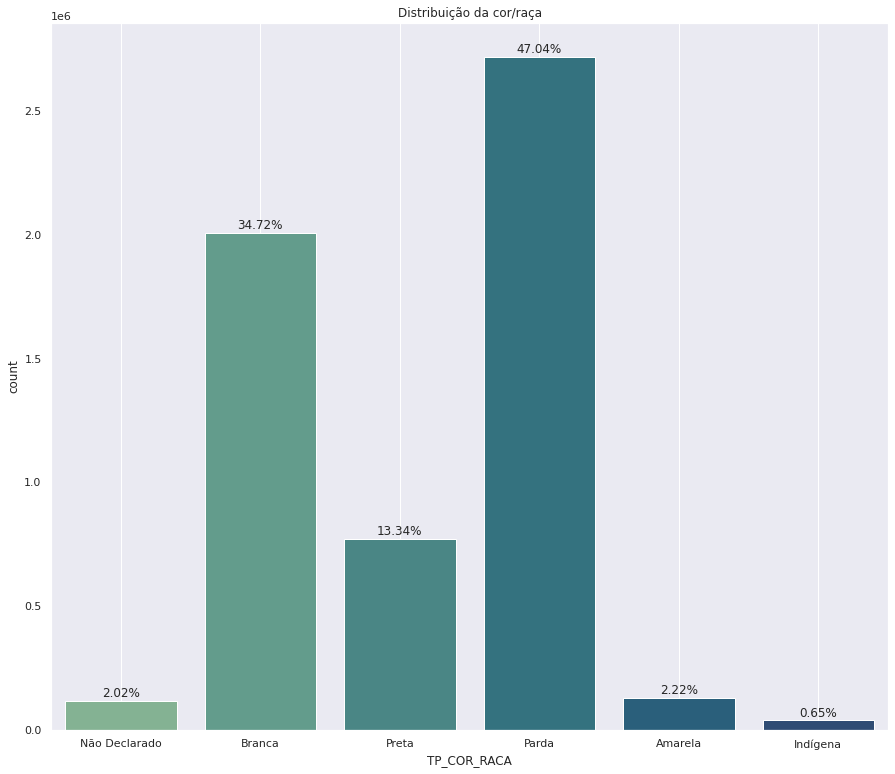

In [ ]:
plt.figure(figsize=(15, 13))
x = np.array([x for x in range(0,6)])
textos = ['Não Declarado','Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']

porcentagens = []
for i in tipos:
  porcentagem = (i * 100)/total
  porcentagens.append(f'{porcentagem:.2f}%')
ax = sns.countplot(data=enem_participante, x = 'TP_COR_RACA', palette='crest')
plt.xticks(x,textos)

ax.bar_label(ax.containers[0], label_type='edge', labels = porcentagens, padding = 1)

plt.title('Distribuição da cor/raça')
plt.grid()
plt.savefig('cor_raca', format = 'jpg')
plt.show()


A maioria dos inscritos do ENEM se identificam como pardos, seguidos dos brancos enquanto a minoria é indígena. Essa distribuição não é totalmente condizente com a divulgada pelo  [Instituto Brasileiro de Geografia e Estatística (IBGE)](https://educa.ibge.gov.br/jovens/conheca-o-brasil/populacao/18319-cor-ou-raca.html), que afirma: 


*   46,8% dos brasileiros se declaram como pardos;
*   42,7% como brancos;
*   9,4% como pretos;
*   1,1% como amarelos ou indígenas.

Os números diferem um pouco em razão da categoria "Não declarado" que o ENEM apresenta, bem como a porcentagem de pessoas autodeclaradas brancas, pretas e amarelas/indígenas.


#### Tipo de escola do Ensino Médio

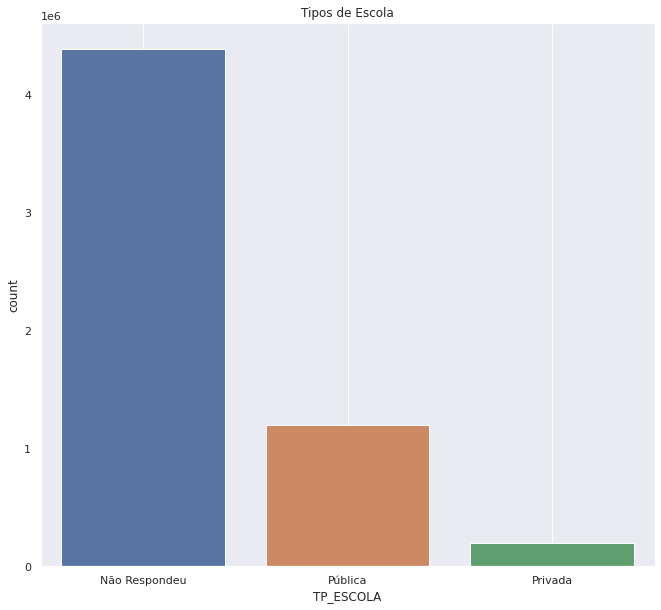

In [ ]:
plt.figure(figsize=(11,10))
x = np.array([0,1,2])
textos = ['Não Respondeu', 'Pública', 'Privada']
sns.countplot(data=enem_participante, x = 'TP_ESCOLA')
plt.xticks(x,textos)
plt.title('Tipos de Escola')
plt.grid()
plt.savefig('escola', format = 'jpg')
plt.show()

Aparentemente, a maioria assinalou a opção "Não respondeu", seguido de "Escola Pública" e, por último, "Escola Privada". Nessa edição, não houve estudantes que cursaram o ensino médio no exterior.
Quanto à quantidade de pessoas que não responderam ao questionário relativo à escolaridade, minha hipótese é de que, ao armazenar os dados, todos que assinalaram "Não frequentei a escola." ou "Parte em escola pública e parte em escola privada" foram englobados em uma só categoria. Esse dado foi retirado do questionário feito na inscrição do ENEM, em que uma das perguntas é "Qual é o tipo de escola que você frequentou?" com as opções:


1.   Somente em escola pública.
2.   Parte em escola pública e parte em escola privada SEM bolsa de estudo integral.
3.   Parte em escola pública e parte em escola privada COM bolsa de estudo integral.
4.   Somente escola privada COM bolsa de estudo integral.
5.   Somente escola privada SEM bolsa de estudo integral.
6.   Não frequentei a escola.



Para testar essa hipótese, eu procurei a linha que informava os meus dados, já que realizei o ENEM 2020, com o código:

```
enem_participante.loc[enem_participante['NU_INSCRICAO'] == (informar qual é o seu número de inscrição)]
```

Quando fiz a minha inscrição, havia assinalado a opção "Parte em escola pública e parte em escola privada SEM bolsa de estudo integral." Ao avaliar a linha que correspondia aos meus dados, notei que o código na coluna "TP_ESCOLA" era 1, "Não respondido", o que comprova a minha hipótese.
A escolha de agrupar aqueles que não frequentaram a escola com quem frequentou parte pública e parte privada impõe uma limitação ao realizar uma análise comparativa entre os desempenhos dos alunos dependendo do tipo da escola.

#### Porcentagem de treineiros

In [ ]:
n, s = enem_participante['IN_TREINEIRO'].value_counts()
porc_treineiros = (100 * s)/ (s + n)
print(f'{porc_treineiros:.2f}% de treineiros.')

9.64% de treineiros.


Nessa edição, apenas 9,64% dos participantes eram treineiros.

### Informações sobre a realização das provas

Para avaliar informações sobre a realização das provas, as colunas selecionadas conterão os valores que informam se o aluno esteve presente em cada prova, ou não, e o tipo de língua estrangeira escolhida (inglês ou espanhol).

In [ ]:
enem_provas = enem.filter(items = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'TP_LINGUA'])

#### Escolha da língua estrangeira

In [ ]:
enem_provas['TP_LINGUA'].value_counts()

1    3106103
0    2677006
Name: TP_LINGUA, dtype: int64

In [ ]:
esp, ing = enem_provas['TP_LINGUA'].value_counts()
porc_esp = (100 * esp)/ (esp + ing)
print(f'{porc_esp:.2f}% dos participantes escolheram a Língua Espanhola e {100 - porc_esp:.2f}% escolheram a Língua Inglesa.')

53.71% dos participantes escolheram a Língua Espanhola e 46.29% escolheram a Língua Inglesa.


Por mais que o Inglês esteja mais presente no dia a dia, é coerente que o Espanhol seja a mais escolhida, tendo em vista que as questões de Língua Estrangeira no ENEM são completamente interpretativas, sem a necessidade de conhecimento gramatical para resolvê-las. Portanto, se o estudante não sabe tanto inglês quanto espanhol, a melhor escolha seria a segunda opção devido a sua similaridade à Língua Portuguesa.

#### Presença no 1º dia

Agora verificaremos quanto dos participantes faltaram às provas do 1º dia, que correspondem às áreas de Linguagens, Ciências Humanas e Redação.

In [ ]:
enem.shape

(5783109, 75)

In [ ]:
falta, presença, eliminado = enem_provas['TP_PRESENCA_CH'].value_counts()
porc_falta = (100 * falta)/ (falta+presença+eliminado)
porc_presença = (100 * presença)/ (falta+presença+eliminado)
print(f' \
{porc_falta:.2f}% dos participantes faltaram às provas do primeiro dia.\n \
{porc_presença:.2f}% estavam presentes.\n \
{100 - porc_falta -porc_presença:.2f}% foram eliminados durante a prova.')

 52.30% dos participantes faltaram às provas do primeiro dia.
 47.62% estavam presentes.
 0.08% foram eliminados durante a prova.


O valor de 52.3% de ausentes foi um índice de abstenção recorde, destoando do índice da edição de 2019, em que apenas 23% dos candidatos não compareceram ao primeiro dia de provas, como divulgado pelo [site do Governo do Brasil](https://www.gov.br/pt-br/noticias/educacao-e-pesquisa/2019/11/exame-nacional-do-ensino-medio-termina-com-menor-indice-de-abstencao). Esse alto valor reflete o contexto do ano de 2020, acometido pela pandemia da COVID-19. Em janeiro de 2021, quando as provas foram aplicadas, a vacinação ainda não havia começado, prevalecendo o medo da contaminação do vírus ao realizar o Exame.

Com o fim de avaliar graficamente os índices de abstenção nas edições do ENEM de 2019 a 2021, elaborei esses dados em um gráfico de linha. Ainda que os microdados das demais edições não estejam mais disponíveis, o Governo Brasileiro publica anualmente a porcentagem de candidatos ausentes no primeiro dia. Os links para acessar a publicação para cada edição estão disponíveis abaixo:


*   [2018](https://www.gov.br/inep/pt-br/assuntos/noticias/enem/enem-2018-tem-menor-percentual-de-ausentes-desde-2009-no-primeiro-dia-de-aplicacao)
*   [2019](https://www.gov.br/pt-br/noticias/educacao-e-pesquisa/2019/11/exame-nacional-do-ensino-medio-termina-com-menor-indice-de-abstencao)
*   [2021](https://www.gov.br/pt-br/noticias/educacao-e-pesquisa/2021/11/taxa-de-comparecimento-no-1o-dia-do-enem-chega-a-74-dos-inscritos)



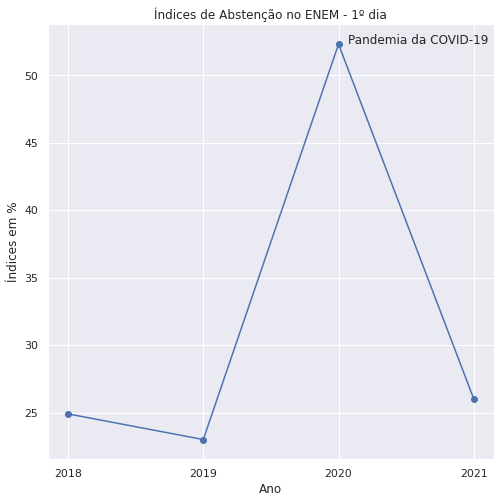

In [ ]:
x = np.array([2018,2019,2020,2021])
y = np.array([24.9,23,52.3,26])

plt.figure(figsize = (8,8))
plt.plot(x, y, marker = 'o')
plt.xticks(x)
plt.title('Índices de Abstenção no ENEM - 1º dia')
plt.xlabel('Ano')
plt.ylabel('Índices em %')
plt.annotate('Pandemia da COVID-19', (2020.07, 52.3))
plt.savefig('primeiro_dia', format = 'jpg')
plt.show()

O gráfico acima deixa ainda mais evidente a discrepância em se tratando dos ausentes no ENEM 2020.

#### Presença no 2º dia

O mesmo será feito ao avaliar o índice de abstenção no 2º dia.

In [ ]:
enem_provas['TP_PRESENCA_MT'].value_counts()

0    3184243
1    2597440
2       1426
Name: TP_PRESENCA_MT, dtype: int64

In [ ]:
falta, presença, eliminado = enem_provas['TP_PRESENCA_MT'].value_counts()
porc_falta = (100 * falta)/ (falta+presença+eliminado)
porc_presença = (100 * presença)/ (falta+presença+eliminado)
print(f' \
{porc_falta:.2f}% dos participantes faltaram às provas do segundo dia.\n \
{porc_presença:.2f}% estavam presentes.\n \
{100 - porc_falta -porc_presença:.2f}% foram eliminados durante a prova.')

 55.06% dos participantes faltaram às provas do segundo dia.
 44.91% estavam presentes.
 0.02% foram eliminados durante a prova.


No segundo dia, em que as provas são de Matemática e Ciências da Natureza, a abstenção é ainda maior, haja vista que além dos ausentes no primeiro dia, há ainda aqueles que desistiram após corrigir as primeiras provas.

A fim de comparar os índices nos dois dias de prova, será feito outro gráfico de linha.

Dados retirados do site gov.br de cada ano:

*   [2018](https://www.gov.br/inep/pt-br/assuntos/noticias/enem/segundo-dia-de-provas-do-enem-2018-tem-melhor-aplicacao-desde-2009)
*   [2019](https://www.gov.br/pt-br/noticias/educacao-e-pesquisa/2019/11/exame-nacional-do-ensino-medio-termina-com-menor-indice-de-abstencao)
*   [2021](https://www.gov.br/pt-br/noticias/educacao-e-pesquisa/2021/11/segundo-dia-de-provas-apresenta-70-de-taxa-de-comparecimento)



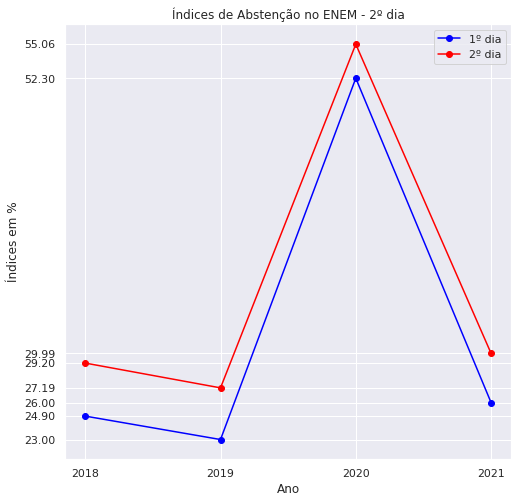

In [ ]:
x = np.array([2018,2019,2020,2021])
y1 = np.array([24.9,23,52.3,26])
y2 = np.array([29.2, 27.19, 55.06, 29.99])

plt.figure(figsize = (8,8))
plt.xticks(x)
plt.yticks([29.2, 27.19, 55.06, 29.99, 24.9,23,52.3,26])
plt.plot(x, y1, marker = 'o', color = 'blue', label = '1º dia')
plt.plot(x, y2, marker = 'o', color = 'red', label = '2º dia')
plt.title('Índices de Abstenção no ENEM - 2º dia')
plt.xlabel('Ano')
plt.ylabel('Índices em %')
plt.legend()
plt.savefig('segundo_dia', format = 'jpg')
plt.show()

A comparação entre os dois gráficos nos informa que, desde 2018, a tendência é de que o índice de abstenção no segundo dia seja superior ao primeiro.

### Resultado das provas

As colunas selecionadas serão as que contêm as notas de cada área do conhecimento.

In [ ]:
enem_resultados = enem.filter(items = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO'])

Para obtermos uma visão geral sobre os dados numéricos, basta utilizar o método .describe()

In [ ]:
enem_resultados.describe().apply(lambda s: s.apply('{0:.1f}'.format)) 
#formatado para não mostrar os resultados na notação científica

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,2597440.0,2754140.0,2597440.0,2754140.0,2754140.0
mean,490.4,511.2,520.6,523.8,573.4
std,80.0,96.2,117.3,74.5,199.8
min,0.0,0.0,0.0,0.0,0.0
25%,427.0,435.3,425.8,478.0,460.0
50%,483.7,512.5,505.1,529.9,580.0
75%,548.7,580.6,602.3,576.4,700.0
max,854.8,862.6,975.0,801.1,1000.0


Percebe-se a média de todos as provas no intervalo de 490 a 523. Além disso, também nos é informado que a prova de redação é aquela em que há maior desvio (o que fica evidente ao avaliar o std, que é o desvio padrão, de cada área do conhecimento), isto é, as notas de redação estão mais dispersas que as outras, tendo várias notas tanto mais abaixo quanto acima da média.

A fim de avaliar a média geral de cada candidato, criaremos uma coluna que corresponde à soma de cada nota dividida pela quantidade de provas realizadas, equivalendo a uma média aritmética simples. Essa coluna também será adicionada ao dataframe original para ser utilizada posteriormente.

In [ ]:
enem_resultados['MEDIA_GERAL']= enem_resultados[list(enem_resultados.columns)].mean(axis=1)
enem['MEDIA_GERAL'] = enem_resultados['MEDIA_GERAL']

In [ ]:
enem_resultados.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,MEDIA_GERAL
0,NaN,NaN,NaN,NaN,NaN,NaN
1,604.1,661.7,711.3,595.3,580.0,630.48
2,NaN,NaN,NaN,NaN,NaN,NaN
3,620.8,675.0,759.4,624.2,760.0,687.88
4,NaN,NaN,NaN,NaN,NaN,NaN


As linhas completamente em branco indicam os alunos que faltaram às provas, logo, não serão relevantes para a avaliação do desempenho e podemos retirá-las.

In [ ]:
enem_resultados = enem_resultados.dropna()

### Relação entre questões socioeconômicas e o desempenho no ENEM

Ao realizar a inscrição para o ENEM, um questionário de 25 perguntas deve ser respondido. Ele tem como objetivo avaliar as diferentes realidades dos estudantes, contendo perguntas referentes à família, à residência e à renda. Escolhi avaliar como a renda mensal, a escolaridade dos pais e o acesso ao computador e à internet em casa se relacionam com o desempenho do candidato. Para isso, os microdados do ENEM serão filtrados mais uma vez, contendo as perguntas selecionadas e a coluna da média geral. 

In [ ]:
enem_quest = enem.filter(items = ['Q001','Q002','Q006','Q024','Q025','MEDIA_GERAL','TP_ESCOLA'])

Agora verificaremos os valores nulos.

In [ ]:
enem_quest.isnull().sum()

Q001             95966
Q002             95966
Q006             95966
Q024             95966
Q025             95966
MEDIA_GERAL    3020210
TP_ESCOLA            0
dtype: int64

Os valores em branco correspondem aos alunos que não realizaram as provas e aqueles que não tiveram o questionário divulgado. O motivo para isso está no arquivo LEIA_ME disponível ao baixar os microdados, que afirma:



> Foram excluídos da base do microdados os registros dos participantes que realizaram as provas: 601,
602 e 684 de Ciências da Natureza; 571, 572 e 654 de Ciências Humanas; 581, 582 e 664 de
Linguagens e Códigos; e 591, 592 e 674 de Matemática. Isso porque o número de participantes que
realizaram essas provas era muito pequeno, o que permitiria a sua identificação indevida.



Tendo isso em vista, todas as linhas em branco serão retiradas.

In [ ]:
enem_quest = enem_quest.dropna()

In [ ]:
enem_quest.head()

,Q001,Q002,Q006,Q024,Q025,MEDIA_GERAL,TP_ESCOLA
5,C,B,C,B,B,566.98,1
8,B,C,B,A,A,471.58,1
11,B,C,B,B,B,587.38,1
18,C,C,B,B,B,537.98,1
19,C,D,D,A,A,466.94,1


Para facilitar, as colunas referentes ao questionário serão renomeadas

In [ ]:
enem_quest = enem_quest.rename(columns = {'Q001' : 'ESCOLA_PAI',
                                  'Q002' : 'ESCOLA_MAE',
                                  'Q006' : 'RENDA',
                                  'Q024' : 'COMPUTADOR',
                                  'Q025' : 'INTERNET'})

In [ ]:
enem_quest.head()

,ESCOLA_PAI,ESCOLA_MAE,RENDA,COMPUTADOR,INTERNET,MEDIA_GERAL,TP_ESCOLA
5,C,B,C,B,B,566.98,1
8,B,C,B,A,A,471.58,1
11,B,C,B,B,B,587.38,1
18,C,C,B,B,B,537.98,1
19,C,D,D,A,A,466.94,1


#### Renda mensal da família

In [ ]:
grafico = enem_quest.groupby(by = 'RENDA')['MEDIA_GERAL'].mean().to_frame()

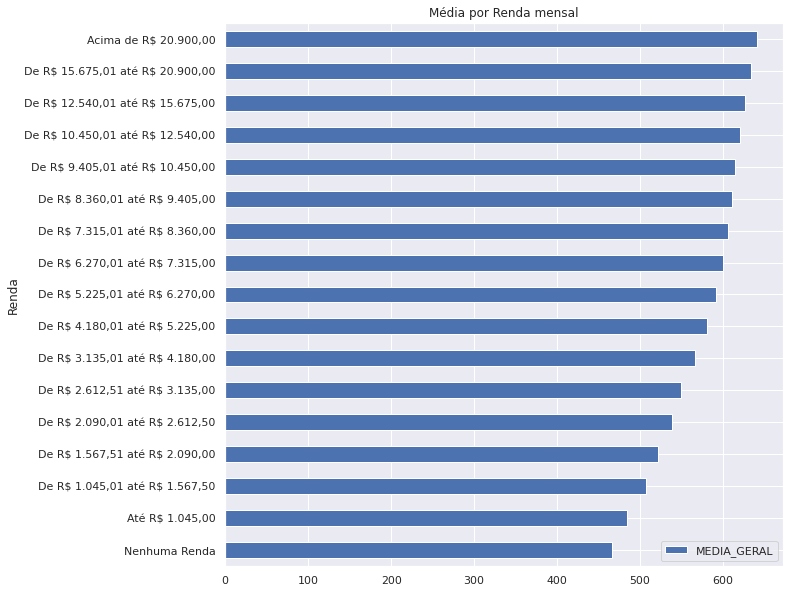

In [ ]:
# x = np.array(['A','B', 'C', 'D','E','F', 'G','H', 'I','J','K','L','M','N','O','P','Q'])
y = np.array([x for x in range(0,17)])
textos = ['Nenhuma Renda', 'Até R\$ 1.045,00', 'De R\$ 1.045,01 até R\$ 1.567,50','De R\$ 1.567,51 até R\$ 2.090,00','De R\$ 2.090,01 até R\$ 2.612,50',\
          'De R\$ 2.612,51 até R\$ 3.135,00', 'De R\$ 3.135,01 até R\$ 4.180,00', 'De R\$ 4.180,01 até R\$ 5.225,00', 'De R\$ 5.225,01 até R\$ 6.270,00',\
          'De R\$ 6.270,01 até R\$ 7.315,00', 'De R\$ 7.315,01 até R\$ 8.360,00','De R\$ 8.360,01 até R\$ 9.405,00', 'De R\$ 9.405,01 até R\$ 10.450,00',\
          'De R\$ 10.450,01 até R\$ 12.540,00', 'De R\$ 12.540,01 até R\$ 15.675,00', 'De R\$ 15.675,01 até R\$ 20.900,00', 'Acima de R\$ 20.900,00']
grafico.plot(kind='barh', title = 'Média por Renda mensal', xlabel='Renda',ylabel='Média',figsize=(10,10))
plt.yticks(y,textos)
plt.savefig('renda.jpg', format = 'jpg', bbox_inches='tight')
plt.show()

O gráfico torna evidente a relação de proporcionalidade entre a média geral e o valor da renda mensal da família do estudante. Dessa forma, aqueles que informaram possuir "Nenhuma renda" têm a menor média enquanto quem possui renda "acima de R$ 20.900,00" apresenta a maior média, o que é condizente com a realidade, uma vez que, com o aumento da renda, há melhores condições para o estudo como a oportunidade de não precisar trabalhar e dedicar-se integralmente aos estudos e a de frequentar aulas de cursinhos pré-vestibulares.

#### Escolaridade da mãe

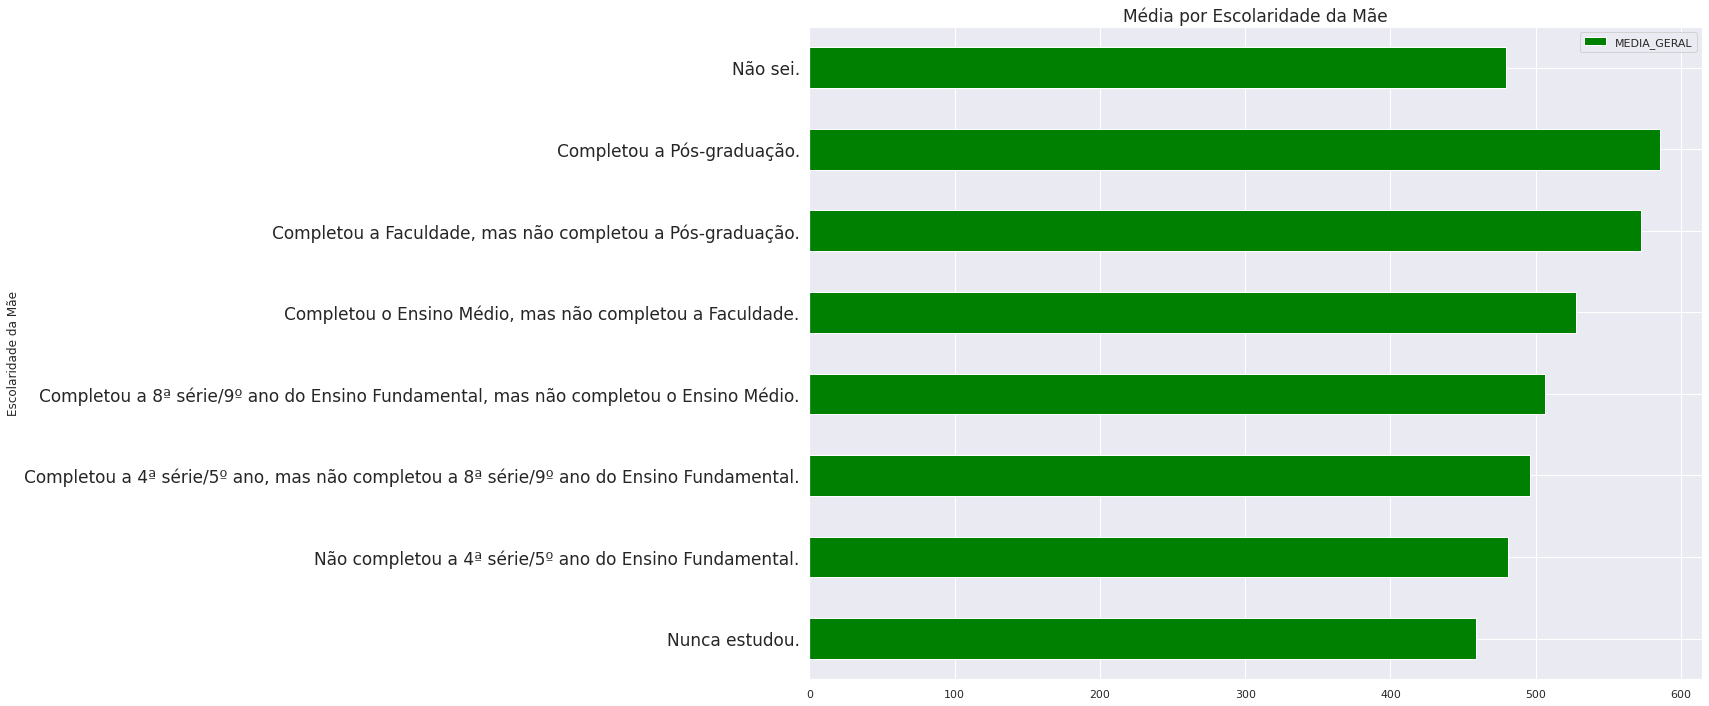

In [ ]:
mae = enem_quest.groupby(by = 'ESCOLA_MAE')['MEDIA_GERAL'].mean().to_frame()
y = np.array([x for x in range(0,8)])
textos = ['Nunca estudou.', 'Não completou a 4ª série/5º ano do Ensino Fundamental.', 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',\
          'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',\
          'Completou o Ensino Médio, mas não completou a Faculdade.','Completou a Faculdade, mas não completou a Pós-graduação.',\
          'Completou a Pós-graduação.','Não sei.']
ax = mae.plot(kind='barh', xlabel='Escolaridade da Mãe',ylabel='Média',figsize=(16,12), color = 'green')
plt.title('Média por Escolaridade da Mãe', fontsize=17)
plt.yticks(y, textos, fontsize =17)
plt.savefig('mae.jpg', format = 'jpg', bbox_inches='tight')
plt.show()

Novamente a relação de proporcionalidade está presente. Quanto mais a mãe estudou, maior foi o desempenho do filho apresentado no ENEM.

#### Escolaridade do pai

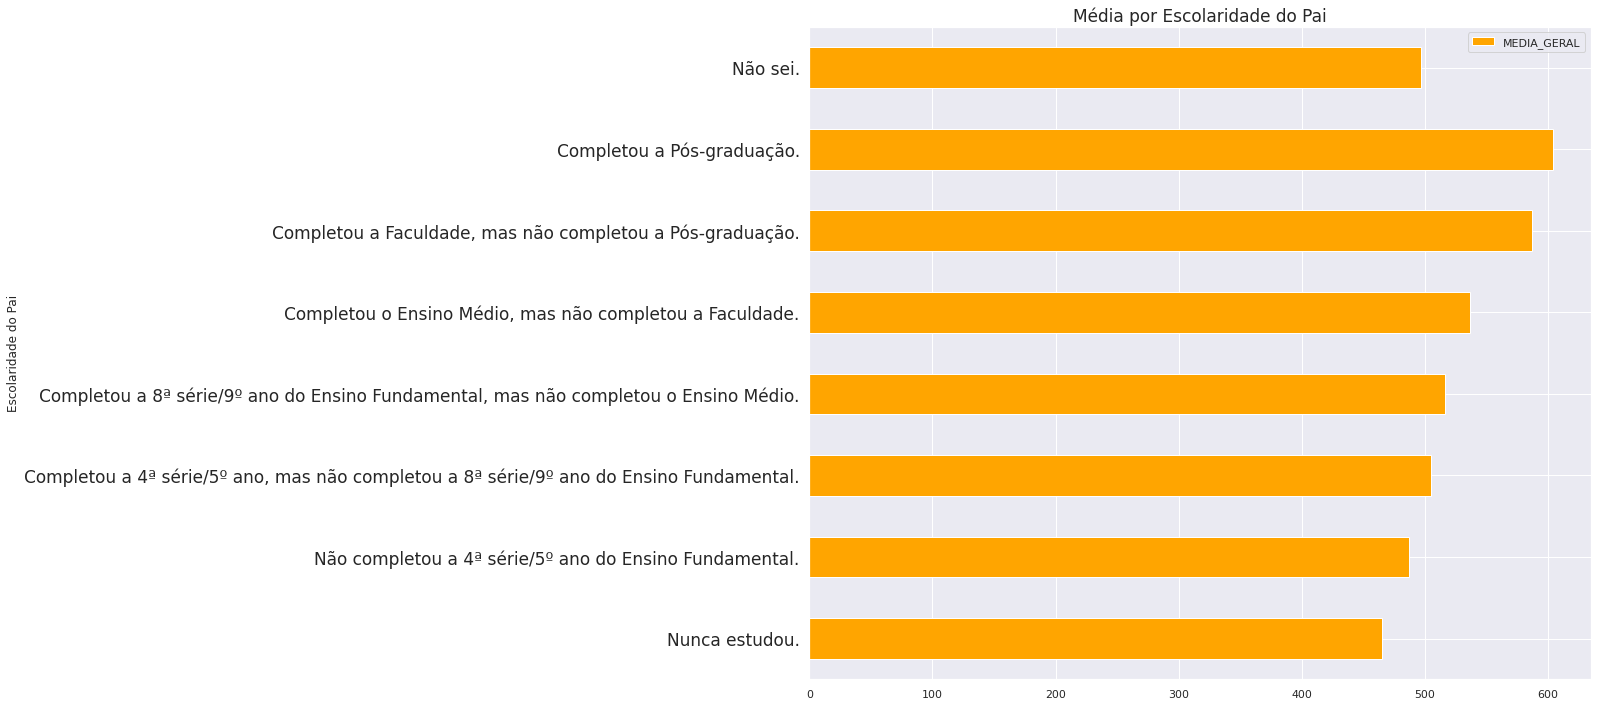

In [ ]:
pai = enem_quest.groupby(by = 'ESCOLA_PAI')['MEDIA_GERAL'].mean().to_frame()
y = np.array([x for x in range(0,8)])
textos = ['Nunca estudou.', 'Não completou a 4ª série/5º ano do Ensino Fundamental.', 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',\
          'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',\
          'Completou o Ensino Médio, mas não completou a Faculdade.','Completou a Faculdade, mas não completou a Pós-graduação.',\
          'Completou a Pós-graduação.','Não sei.']
pai.plot(kind='barh', xlabel='Escolaridade do Pai',ylabel='Média',figsize=(14,12), color = 'orange')
plt.title('Média por Escolaridade do Pai', fontsize=17)
plt.yticks(y, textos, fontsize =17)
plt.savefig('pai.jpg', format = 'jpg', bbox_inches='tight')
plt.show()

Em relação à escolaridade do pai, há semelhanças no modo como o gráfico se apresenta quando comparado ao gráfico da escolaridade da mãe. Entretanto, independente de qual seja a escolaridade do pai, a média geral é maior quando comparada com a avaliada a partir da mãe.

#### Escola pública X Escola privada

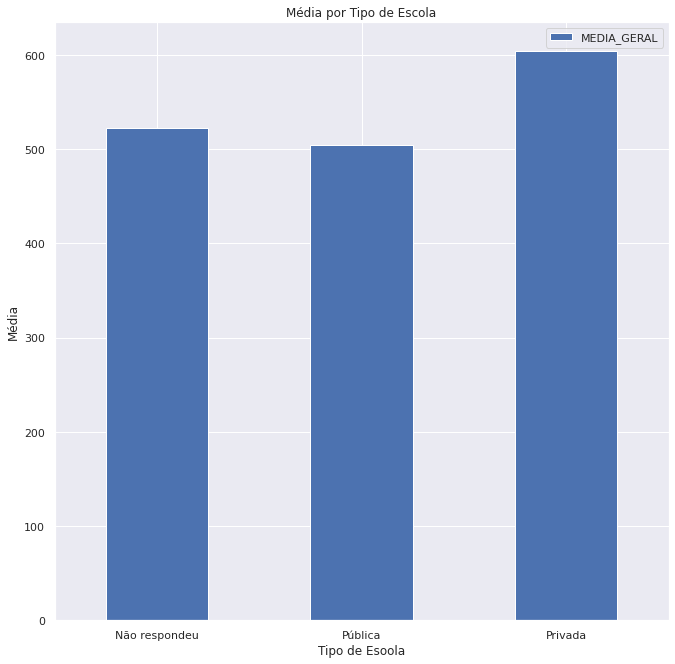

In [ ]:
escola = enem_quest.groupby(by = 'TP_ESCOLA')['MEDIA_GERAL'].mean().to_frame()
x = np.array([0,1,2])
textos = ['Não respondeu', 'Pública', 'Privada']
escola.plot(kind='bar', title = 'Média por Tipo de Escola', xlabel='Tipo de Esoola',ylabel='Média',figsize=(11, 11))
plt.xticks(x,textos, rotation=360)
plt.savefig('publica_privada.jpg', format = 'jpg')
plt.show()

Percebe-se o quão destoante o desempenho dos alunos de escola privada é da escola pública, com 100 pontos de diferença. Em se tratando do grupo 1, é difícil discorrer sobre devido à diversidade de realidades englobadas em um só grupo, já que esse possui as pessoas que não frequentaram quaisquer tipo de escola e aquelas que frequentaram ambos os tipos, com ou sem bolsa integral.

#### Computador em casa

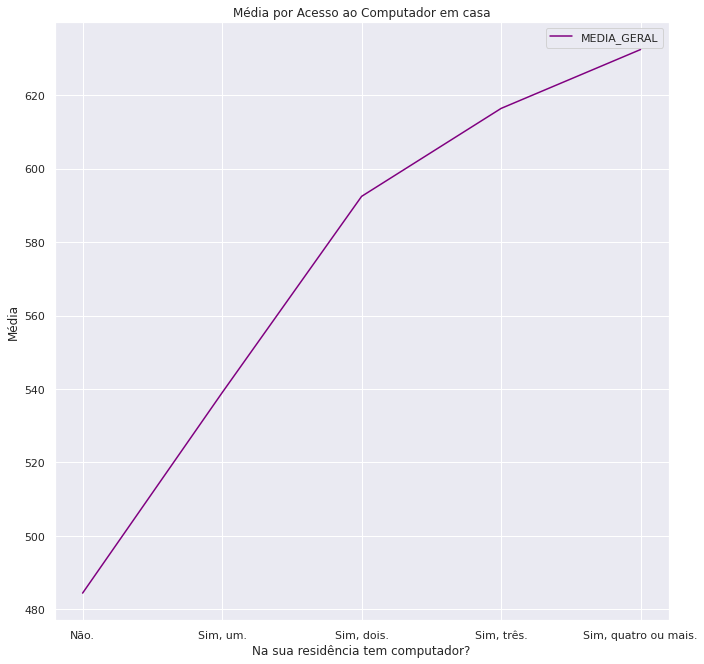

In [ ]:
pc = enem_quest.groupby(by = 'COMPUTADOR')['MEDIA_GERAL'].mean().to_frame()
x=np.array([0,1,2,3,4])
textos = ['Não.','Sim, um.', 'Sim, dois.','Sim, três.', 'Sim, quatro ou mais.' ]
pc.plot(kind='line', title = 'Média por Acesso ao Computador em casa', xlabel='Na sua residência tem computador?',ylabel='Média',figsize=(11, 11), color = 'purple')
plt.xticks(x,textos)
plt.savefig('computador.jpg', format = 'jpg')
plt.show()

Quanto mais computadores o estudante tem em casa maior é a média. Ademais, fica evidente a diferença entre não ter um computador e possuir 2, enquanto  a diferença entre quem possui 3 e 4 ou mais é bem menor. Essa é uma conclusão que procede com a realidade, já que a internet é uma ótima fonte para encontrar exercícios e aulas e a que ficamos submetidos durante a pandemia, sem escolas funcionando presencialmente. Além disso, a quantidade de computadores provavelmente está relacionada à renda mensal que, quanto maior é, mais são as condições proporcionadas pelos pais para criar um ambiente de estudo propício para o filho: pagando escola privada, não lhe impondo a necessidade de trabalhar e o acesso ao computador.

#### Acesso à Internet

In [ ]:
internet = enem_quest.groupby(by = 'INTERNET')['MEDIA_GERAL'].mean().to_frame()
internet = internet.rename(index = {'A' : 'Não', 'B' : 'Sim'})
internet

,MEDIA_GERAL
INTERNET,
Não,473.063018
Sim,532.504645


In [ ]:
diferenca = (internet['MEDIA_GERAL'][1] * 100) / internet['MEDIA_GERAL'][0]
print(f'{diferenca - 100:.2f}')

12.57


Logo, o grupo de estudantes que tem acesso à internet em casa tem a sua média geral 12.6% maior que aqueles sem internet. 